# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 4:
1. 1712615 - Nguyễn Trọng Nghĩa - [GitHub](https://github.com/nguyentrongnghia142)
2. [1712683] - Phạm Hoàng Phương - [Github]
3. [MSSV] - [Họ tên] - [Nick Github]
4. [MSSV] - [Họ tên] - [Nick Github]

Link thùng chứa Github của nhóm: [Repo](https://github.com/nguyentrongnghia142/CommonLit-Readability-Prize)

## Mô tả bài toán
[Bài toán](https://www.kaggle.com/c/commonlitreadabilityprize/overview)

* Bài toán dựa trên nhu cầu trong giáo dục của một tổ chức phi lợi nhuận nhằm cải thiện kĩ năng đọc và viết cho lớp học từ 3-12.
* Bài toán nhằm cải thiện và đánh giá độ phức tạp của các đoạn trích, đoạn văn để thay thế các phương thức truyền thống cũ như Flesch-Kincaid Grade Level ...
* Lợi ích: 
  - Giúp người học tiếp cận bài đọc đúng khả năng của mình và dễ dàng tiếp thu nó.
  - Giúp có động lực hơn trong việc học và phát triển một cách tự nhiên hơn.
  - Tránh được các điểm yếu mà phương pháp truyền thống cũ mang lại.

* Dữ liệu các đoạn trích được lấy từ nhiều lĩnh vực và được nhiều người ở các độ tuổi khác nhạu đánh giá. 
* Dữ liệu chủ yếu bao gồm các đoạn trích, điểm số độ phức tạp, và độ lệnh chuẩn của điểm số.


## Giải quyết bài toán
[Giải pháp](https://www.kaggle.com/c/commonlitreadabilityprize/discussion/258148) - Đứng thứ 4 trong private leaderboard

#### Lấy dữ liệu


In [ ]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1_A5Y2u2XjFVfxVBr6flozZ-Gr0gKRaGm" -O commonlitreadabilityprize.zip &> /dev/null
!unzip /content/commonlitreadabilityprize.zip

#### EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("train.csv",index_col=0)
data_train.head(3)

,url_legal,license,excerpt,target,standard_error
id,,,,,
c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676


In [ ]:
data_train = data_train.dropna(axis = 1)
data_train.shape

(2834, 3)

In [ ]:
data_train.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


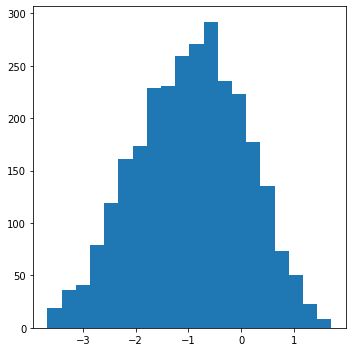

In [ ]:
df = data_train
n_bins = 20
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True, tight_layout=True)

axs.hist(df.target, bins=n_bins);
# axs[1].hist(df.standard_error, bins=n_bins);

* Nhận xét :
  - Đa phần các đoạn text đều trong tập train đều ở mức độ khó.

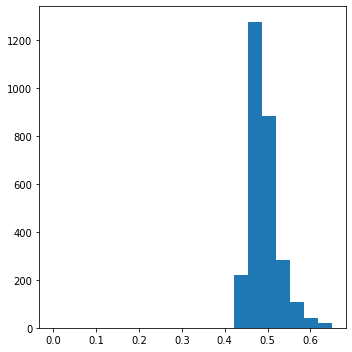

In [ ]:
fig, axs = plt.subplots(1, figsize=(5, 5), sharey=True, tight_layout=True)

axs.hist(df.standard_error, bins=n_bins);

* Nhận xét: Độ lệch chuẩn của các đánh giá đa phần giao động trong khoảng 0.5

## Nhìn lại quá trình làm đồ án

Sau bao ngày vất vả làm đồ án thì bây giờ đã kết thúc. Bây giờ là lúc để ngồi uống coffee và tĩnh tâm nhìn lại quá trình làm.

- Mỗi thành viên: Đã gặp những khó khăn gì? (Hay mọi chuyện đều thuận lợi)
- Mỗi thành viên: Có học được gì hữu ích? (Hay không học được gì)
- Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

Phần này có sao thì bạn nói vậy thôi, chứ không phải là viết
cho có, hoặc tự chế ra để nghe cho hay.

## Tài liệu tham khảo

Để hoàn thành đồ án này, nhóm bạn đã tham khảo những tài liệu nào?